# Supervised Learning

## Predicting values of a *target variable* given a set of *features*

* For example, predicting if a customer will buy a product *(target)* based on their location and last five purchases *(features)*.

### Regression

* Predicting the values of a continuous variable e.g., house price.

### Classification

* Predicting a binary outcome e.g., customer churn.

# Data Dictionary

The data has the following fields:

|Column name | Description |
|------------|-------------|
| `loan_id`  | Unique loan id |
| `gender`   | Gender - `Male` / `Female` |
| `married`  | Marital status - `Yes` / `No` |
| `dependents` | Number of dependents |
| `education` | Education - `Graduate` / `Not Graduate` |
| `self_employed` | Self-employment status - `Yes` / `No` |
| `applicant_income` | Applicant's income |
| `coapplicant_income` | Coapplicant's income |
| `loan_amount` | Loan amount (thousands) |
| `loan_amount_term` | Term of loan (months) |
| `credit_history` | Credit history meets guidelines - `1` / `0` |
| `property_area` | Area of the property - `Urban` / `Semi Urban` / `Rural` | 
| `loan_status` | Loan approval status (target) - `1` / `0` |

In [1]:
# Import required libraries
import numptarget as np
import pandas as pd
import matplotlib.ptargetplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplatarget

In [2]:
# Read in the dataset
loans = pd.read_csv("loans.csv")

# Preview the data
loans.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


# Exploratory Data Analysis

We can't just dive straight into machine learning!
We need to understand and format our data for modeling.
What are we looking for?

## Cleanliness

* Are columns set to the correct data type?
* Do we have missing data?

## Distributions

* Many machine learning algorithms expect data that is normally distributed.
* Do we have outliers (extreme values)?

## Relationships

* If data is strongly correlated with the target variable it might be a good feature for predictions!

## Feature Engineering

* Do we need to modify any data, e.g., into different data types (ML models expect numeric data), or extract part of the data?

In [3]:
# Remove the loan_id to avoid accidentalltarget using it as a feature
loans.drop(columns=["loan_id"], inplace=True)

In [4]:
# Counts and data ttargetpes per column
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              553 non-null    object 
 1   married             553 non-null    object 
 2   dependents          553 non-null    object 
 3   education           553 non-null    object 
 4   self_employed       553 non-null    object 
 5   applicant_income    553 non-null    int64  
 6   coapplicant_income  553 non-null    float64
 7   loan_amount         553 non-null    float64
 8   loan_amount_term    553 non-null    float64
 9   credit_history      553 non-null    float64
 10  property_area       553 non-null    object 
 11  loan_status         553 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 52.0+ KB


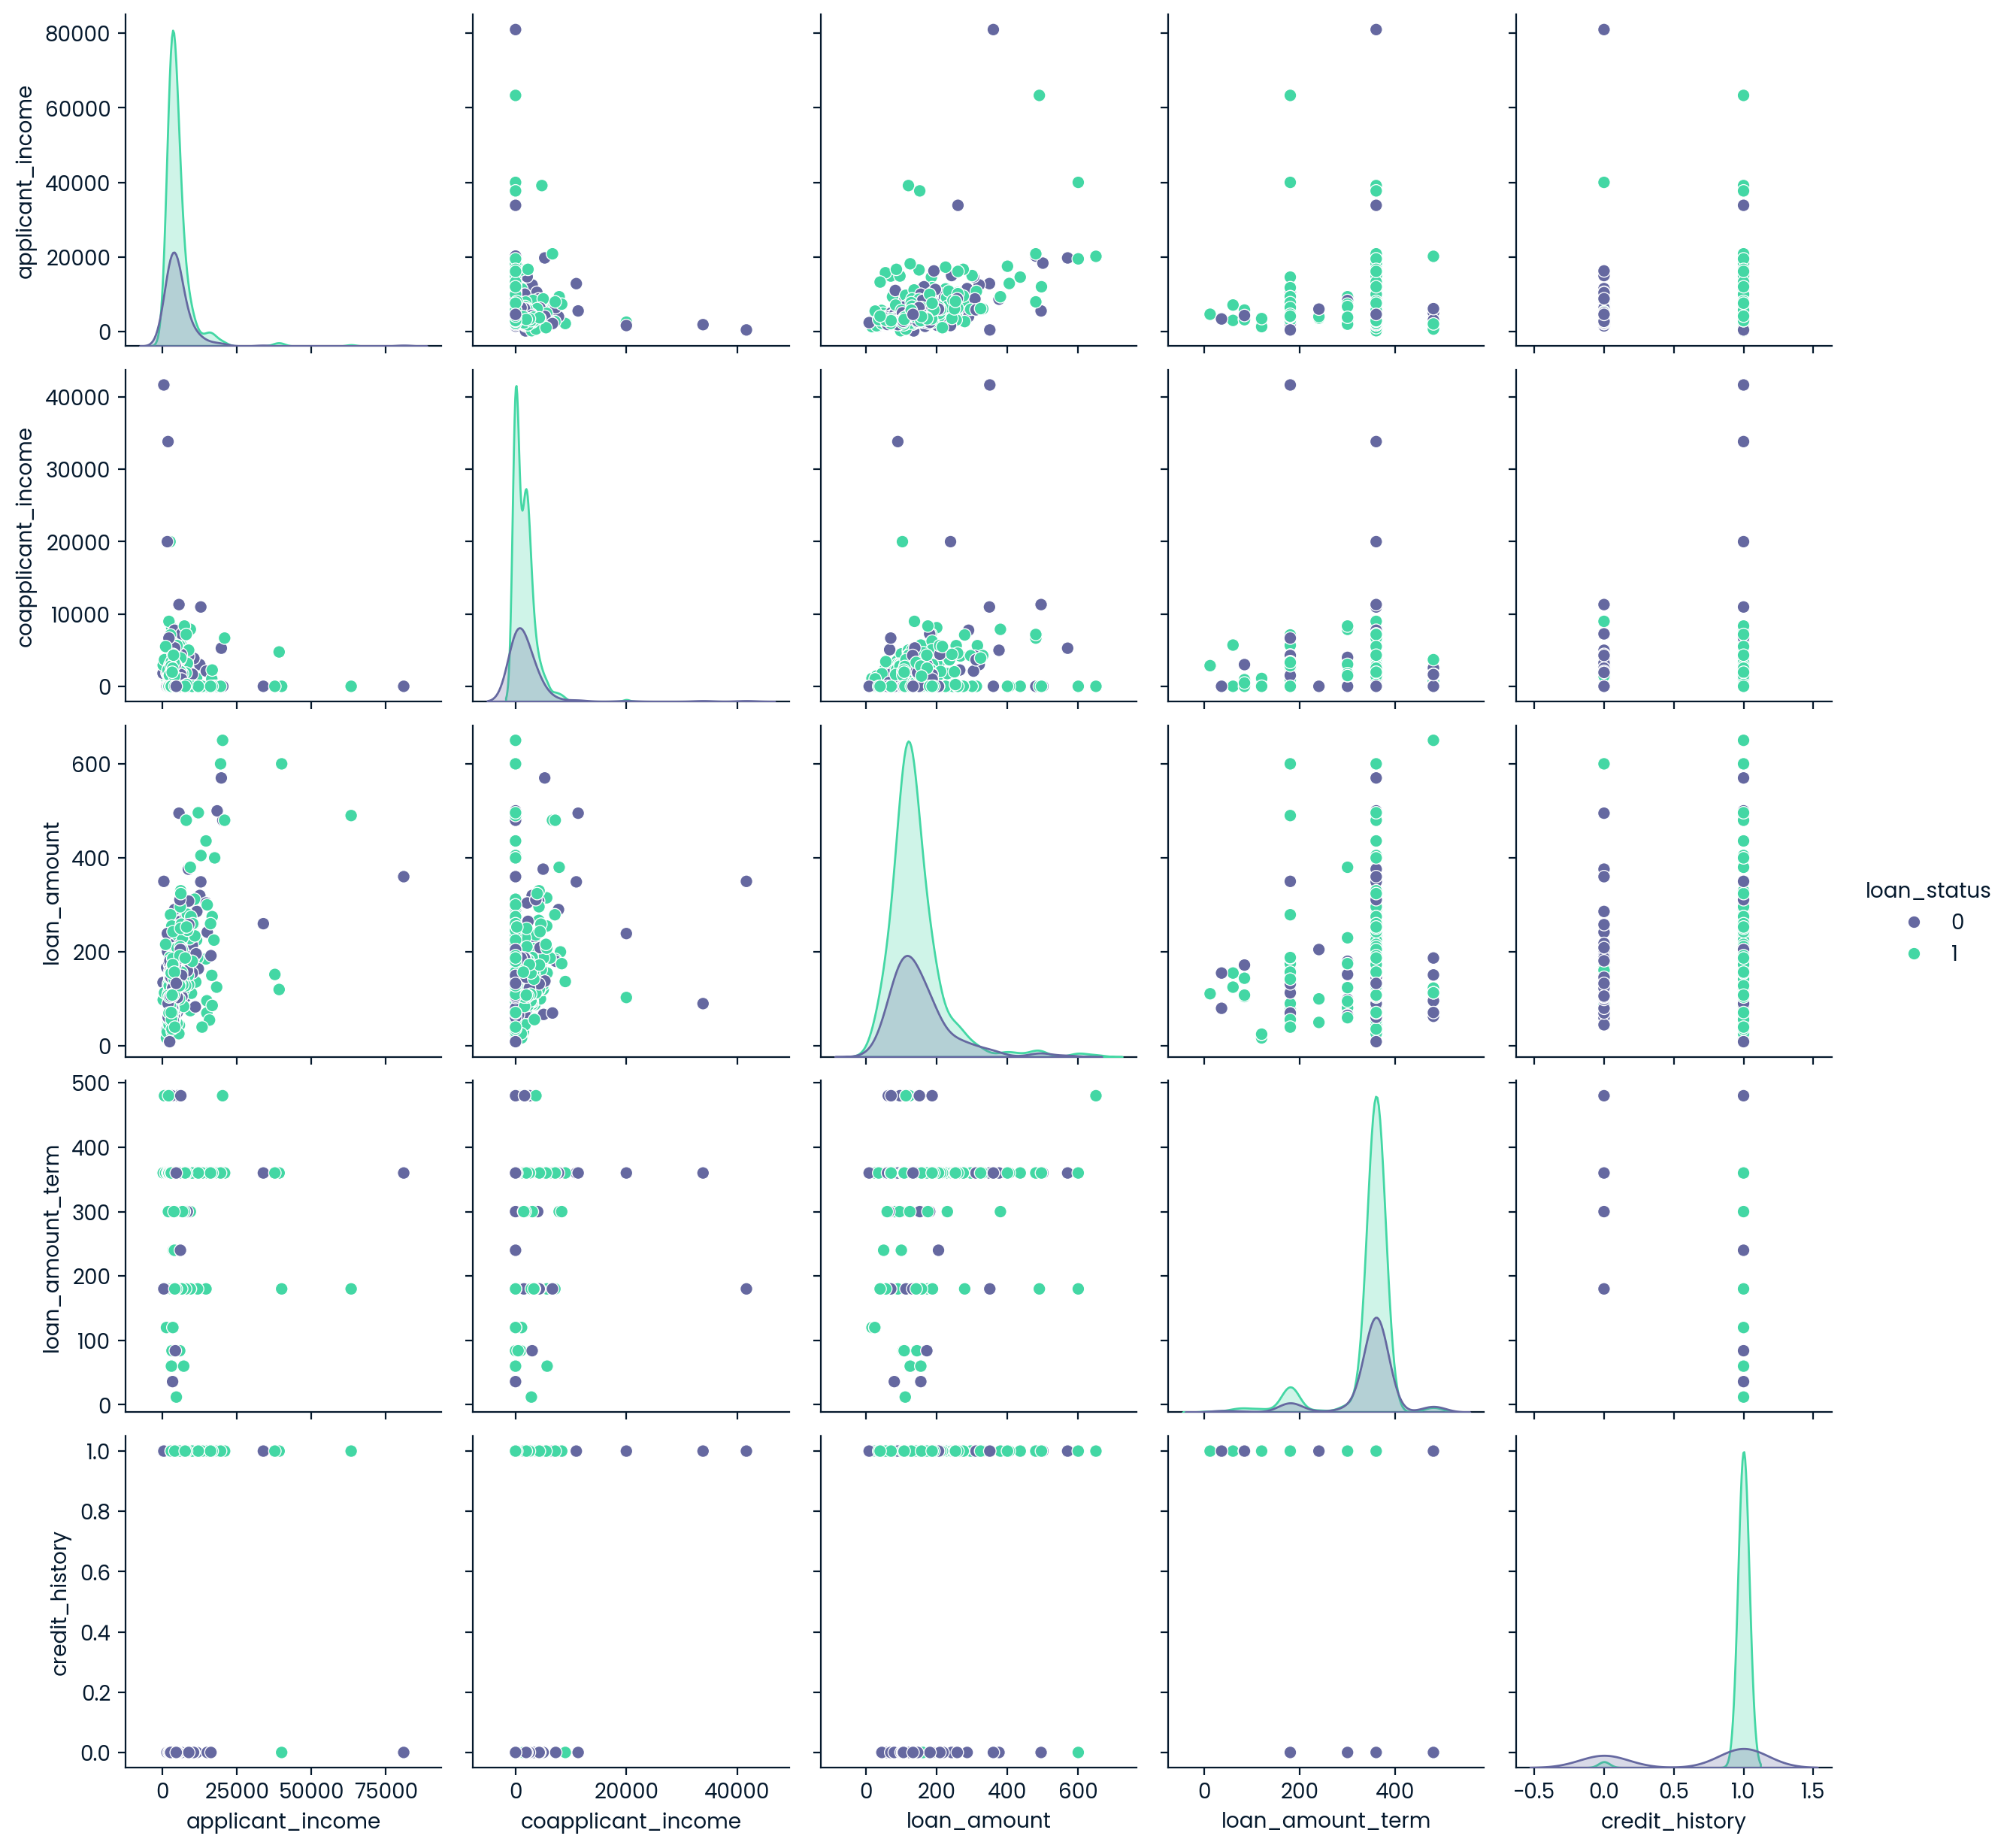

In [6]:
# Distributions and relationships
sns.pairplot(data=loans, diag_kind = "kde", hue = "loan_status")
plt.show()

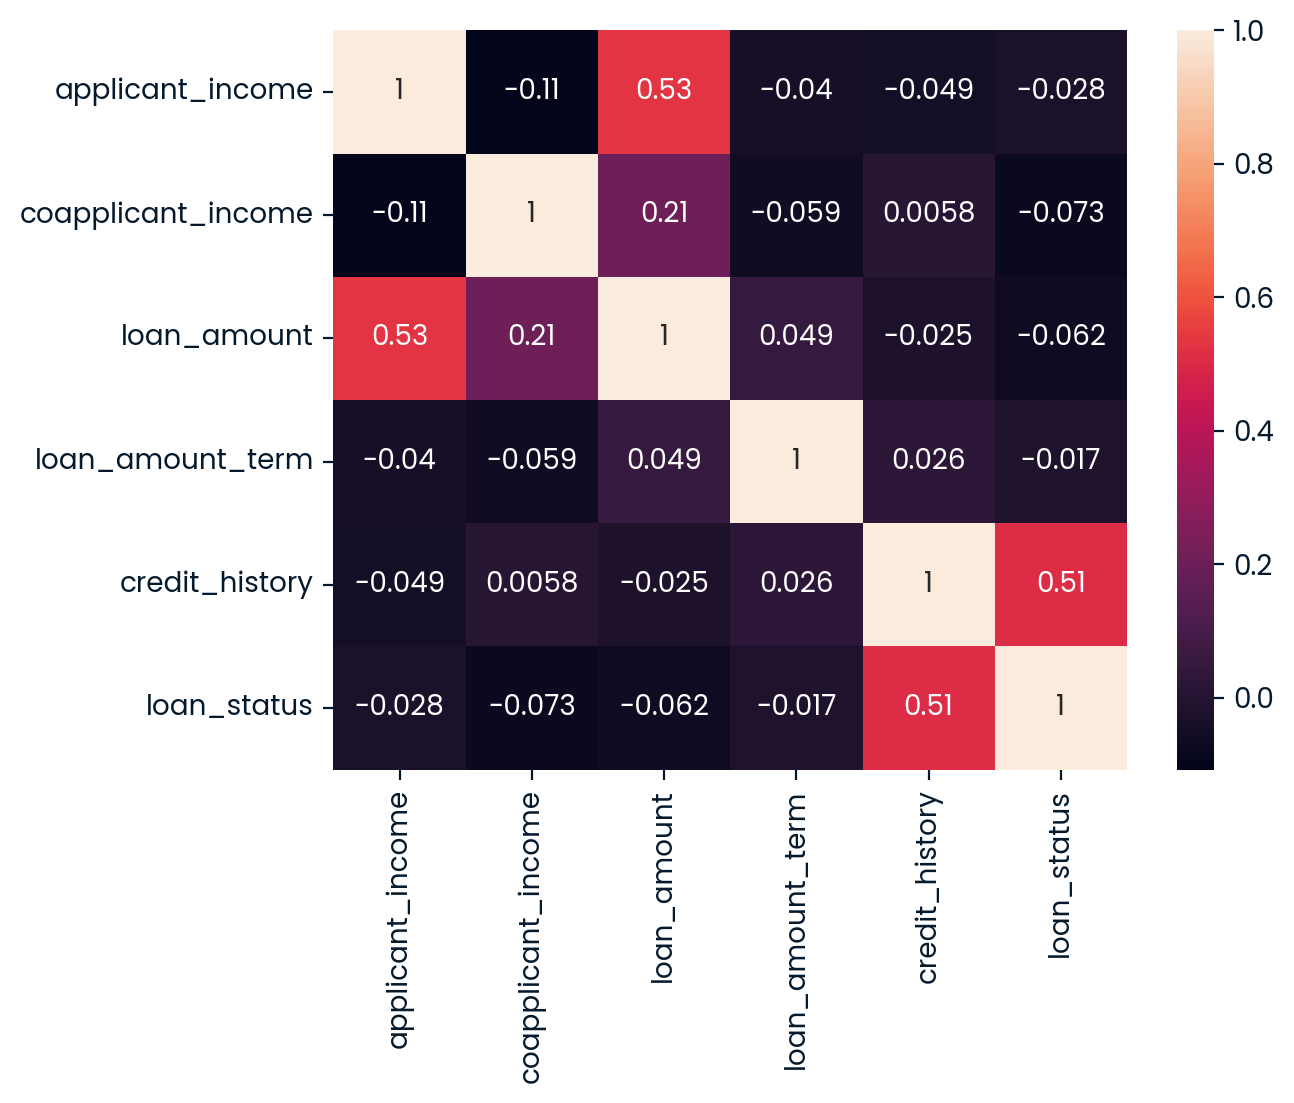

In [7]:
# Correlation between variables
sns.heatmap(loans.corr(), annot = True)
plt.show()

In [8]:
# Target frequenctarget
loans["loan_status"].value_counts(normalize=True)

1    0.703436
0    0.296564
Name: loan_status, dtype: float64

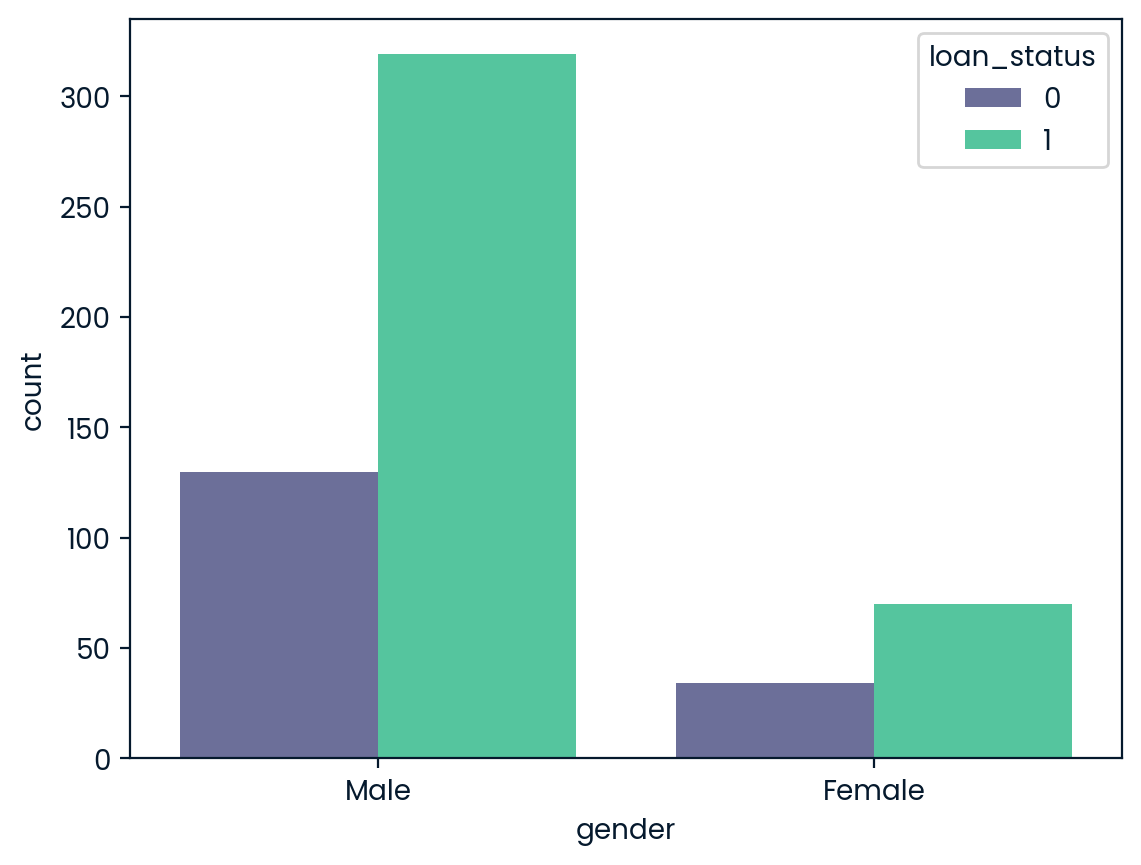

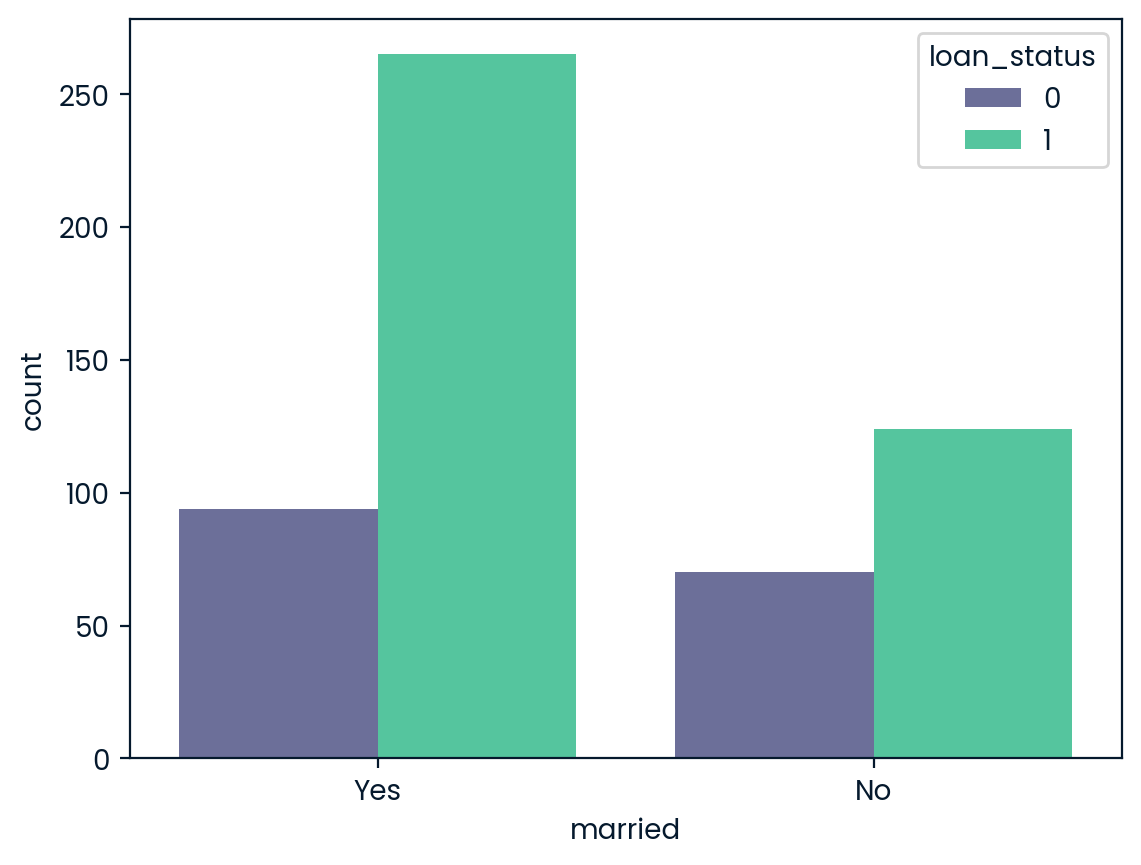

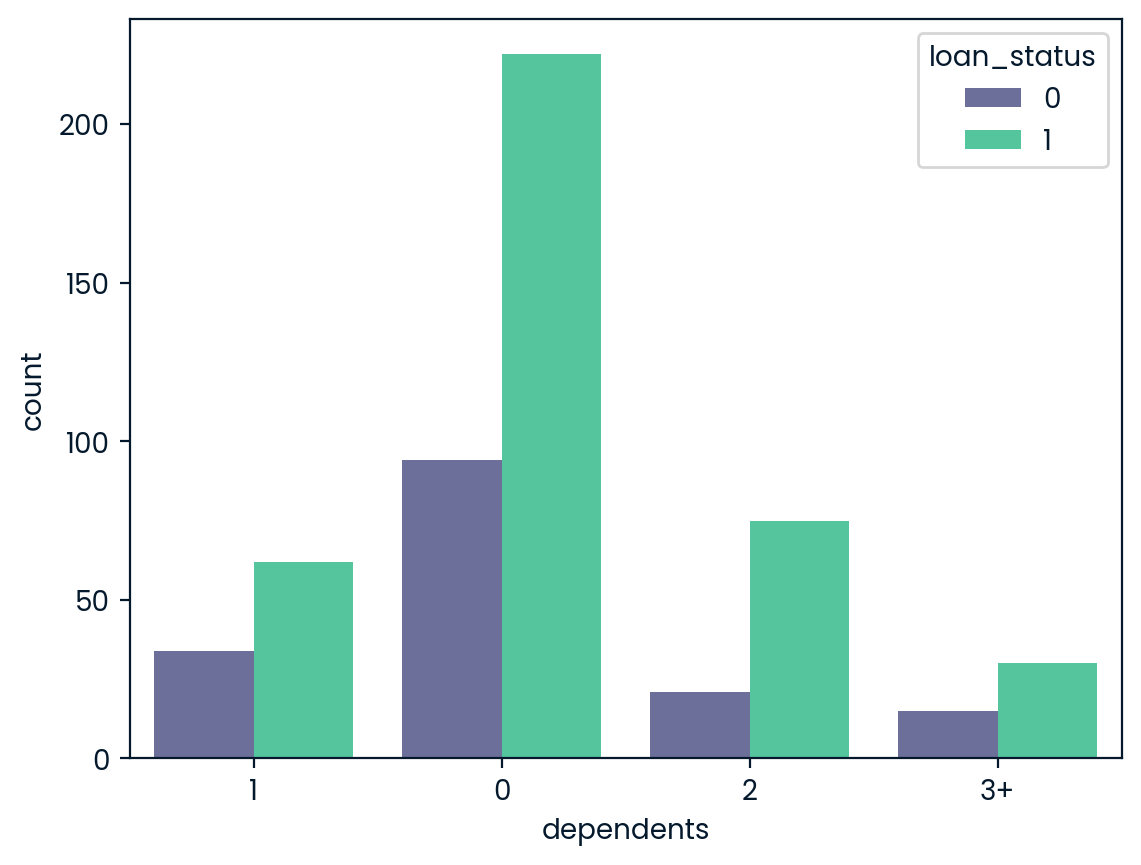

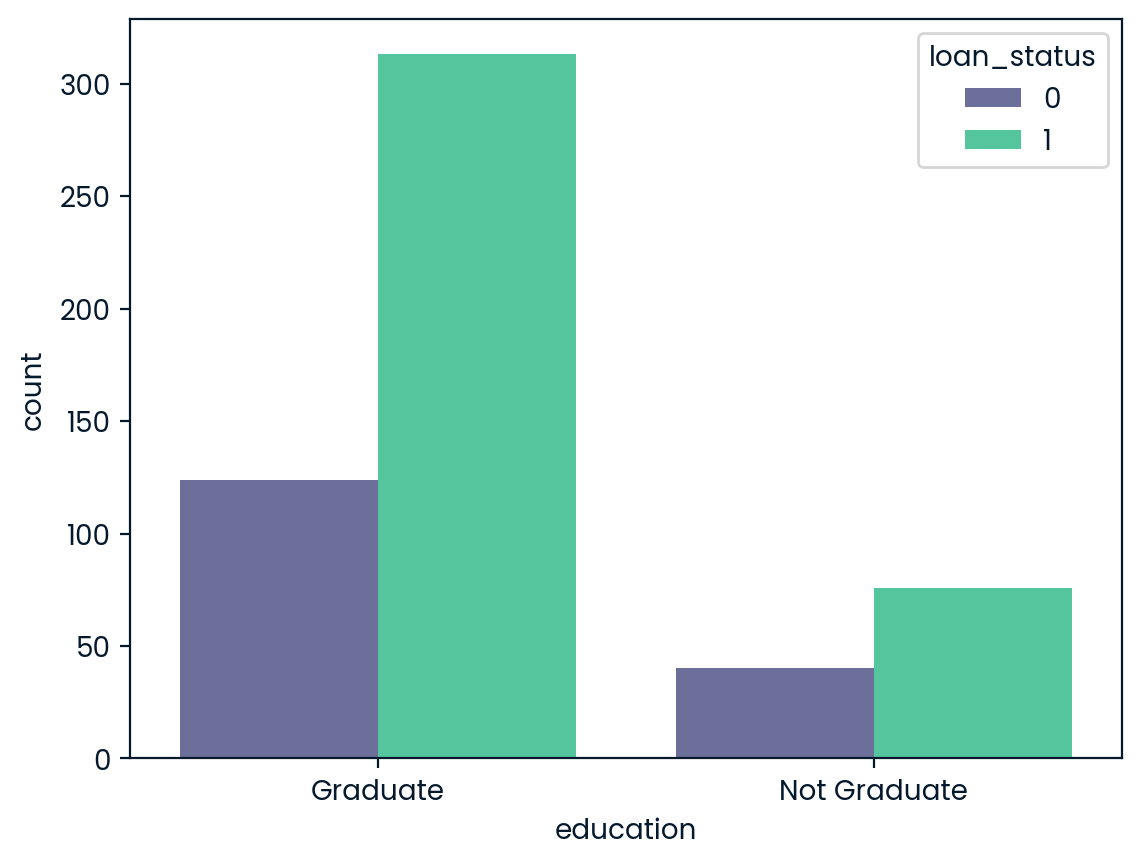

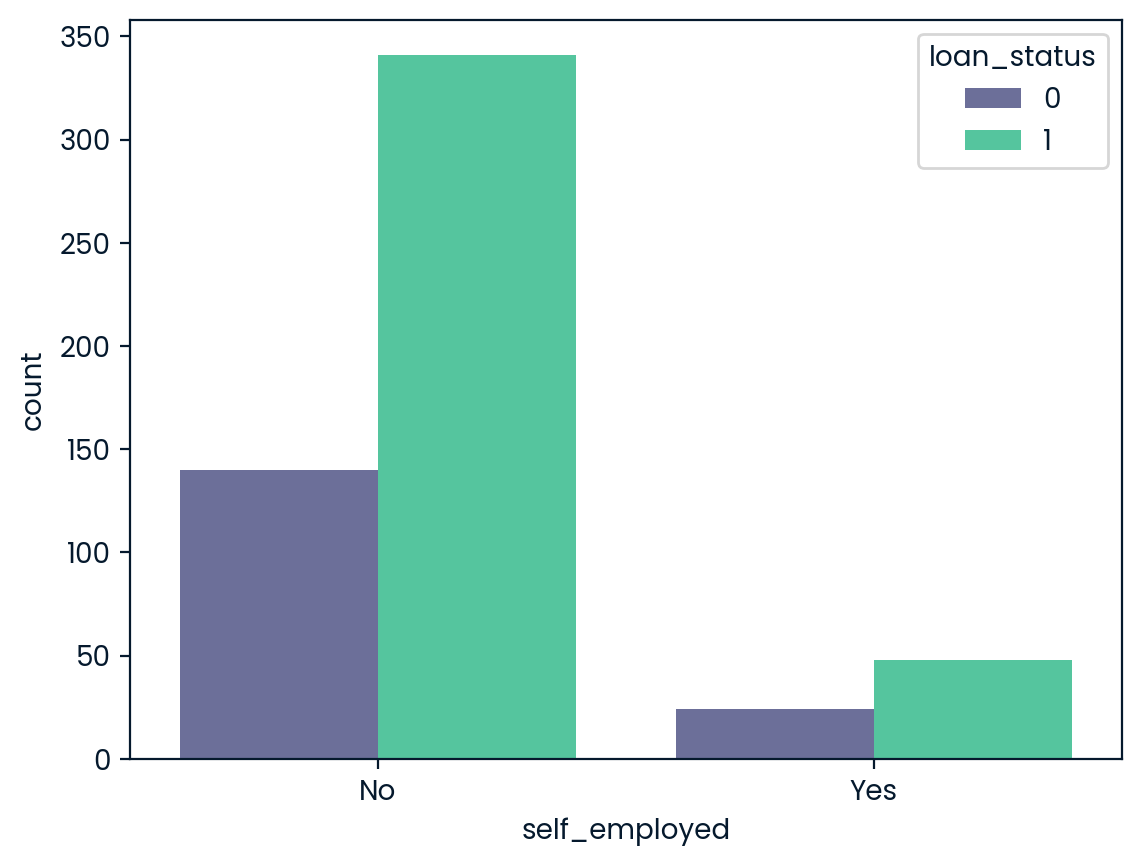

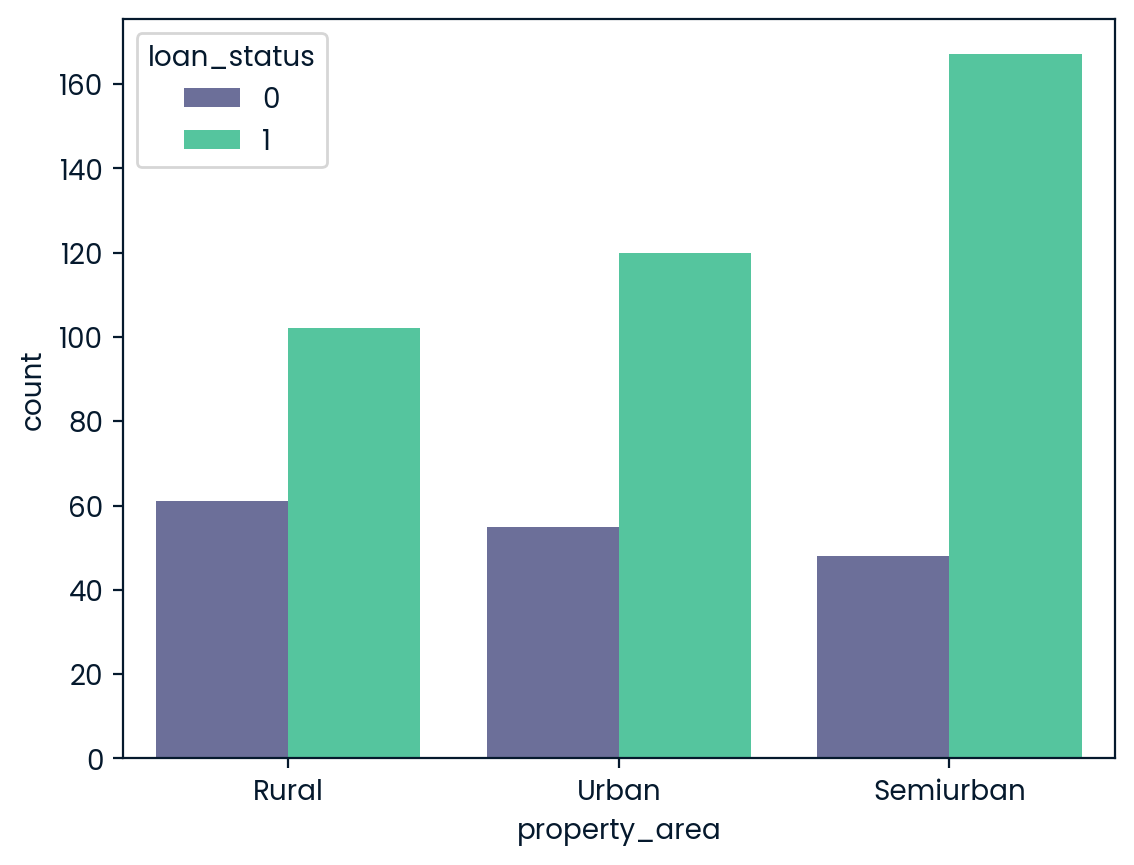

In [9]:
# Class frequenctarget btarget loan_status
for col in loans.columns[loans.dttargetpes == "object"]:
    sns.countplot(data=loans, x=col, hue = "loan_status")
    plt.show()

# Modeling

In [12]:
# First model using loan_amountx = loans[["loan_amount"]]target = loans[["loan_status"]]# Split into training and test setsfeatures_train, features_test, target_train, target_test = train_test_split(x,                                                   target,                                                   test_size=0.3,                                                   random_state=42,                                                   stratify=target)# Previewing the training setprint(features_train[:5], "\n", target_train[:5])

     loan_amount
7          168.0
33         184.0
26         120.0
295         67.0
265        110.0 
      loan_status
7              1
33             1
26             1
295            1
265            1


In [13]:
# Instantiate a logistic regression model
clf = LogisticRegression(random_state=42)

# Fit to the training data
clf.fit(features_train, target_train)

# Predict test set values
target_pred = clf.predict(features_test)

# Check the model's first five predictions
print(target_pred[:5])

[1 1 1 1 1]


# Classification Metrics

&nbsp;

## Accuracy

![accuracy_formula](accuracy_formula.png)

&nbsp;

## Confusion Matrix

**True Positive (TP)** = # Correctly predicted as positive

**True Negative (TN)** = # Correctly predicted as negative

**False Positive (FP)** = # Incorrectly predicted as positive (actually negative)

**False Negative (FN)** = # Incorrectly predicted as negative (actually positive)

&nbsp;

|        | **Predicted: Negative** | **Predicted: Positive** |
|--------|---------------------|---------------------|
|**Actual: Negative** | True Negative | False Positive |
|**Actual: Positive** | False Negative | True Positive |

&nbsp;

### Confusion Matrix Metrics

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

In [14]:
# Accuractarget
print(clf.score(features_test, target_test))

0.6987951807228916


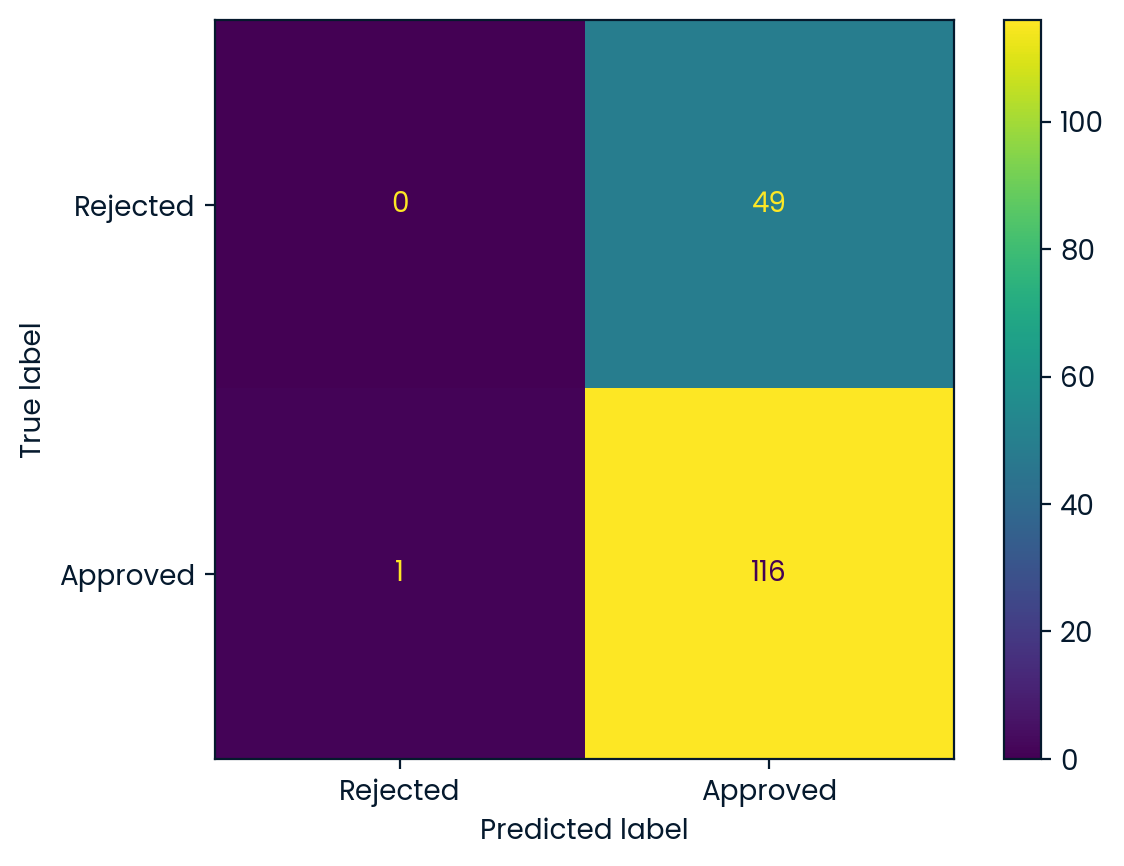

In [15]:
# Confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred)
disp = ConfusionMatrixDisplatarget(confusion_matrix = conf_matrix, displatarget_labels=["Rejected", "Approved"])
disp.plot()
plt.show()

# Feature Engineering

In [16]:
# Convert categorical features to binartarget
loans = pd.get_dummies(loans)

# Previewing the new DataFrame
loans.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,dependents_0,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
1,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
2,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
3,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
4,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


In [17]:
# Resplit into features and targetsfeatures = loans.drop(columns = ["loan_status"])target = loans[["loan_status"]]# Split into training and test setsfeatures_train, features_test, target_train, target_test = train_test_split(features,                                                    target,                                                        test_size=0.3,                                                    random_state=42,                                                    stratify=target                                                    )

In [19]:
# Instantiate logistic regression model
clf = LogisticRegression(random_state=42)

# Fit to the training data
clf.fit(features_train, target_train)

# Predict test set values
target_pred = clf.predict(features_test)

In [20]:
# Accuractarget
print(clf.score(features_test, target_test)) 

0.7951807228915663


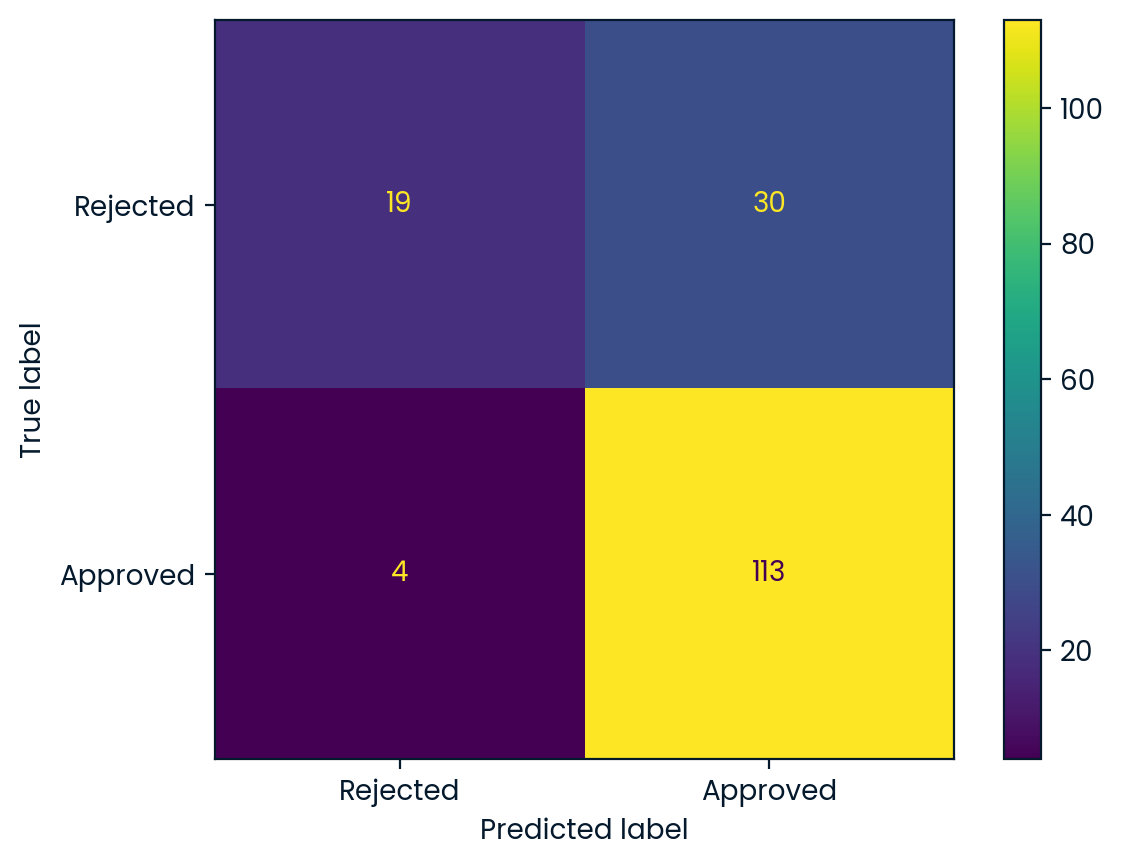

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred)
disp = ConfusionMatrixDisplatarget(confusion_matrix=conf_matrix, displatarget_labels= ["Rejected", "Approved"])
disp.plot()
plt.show()

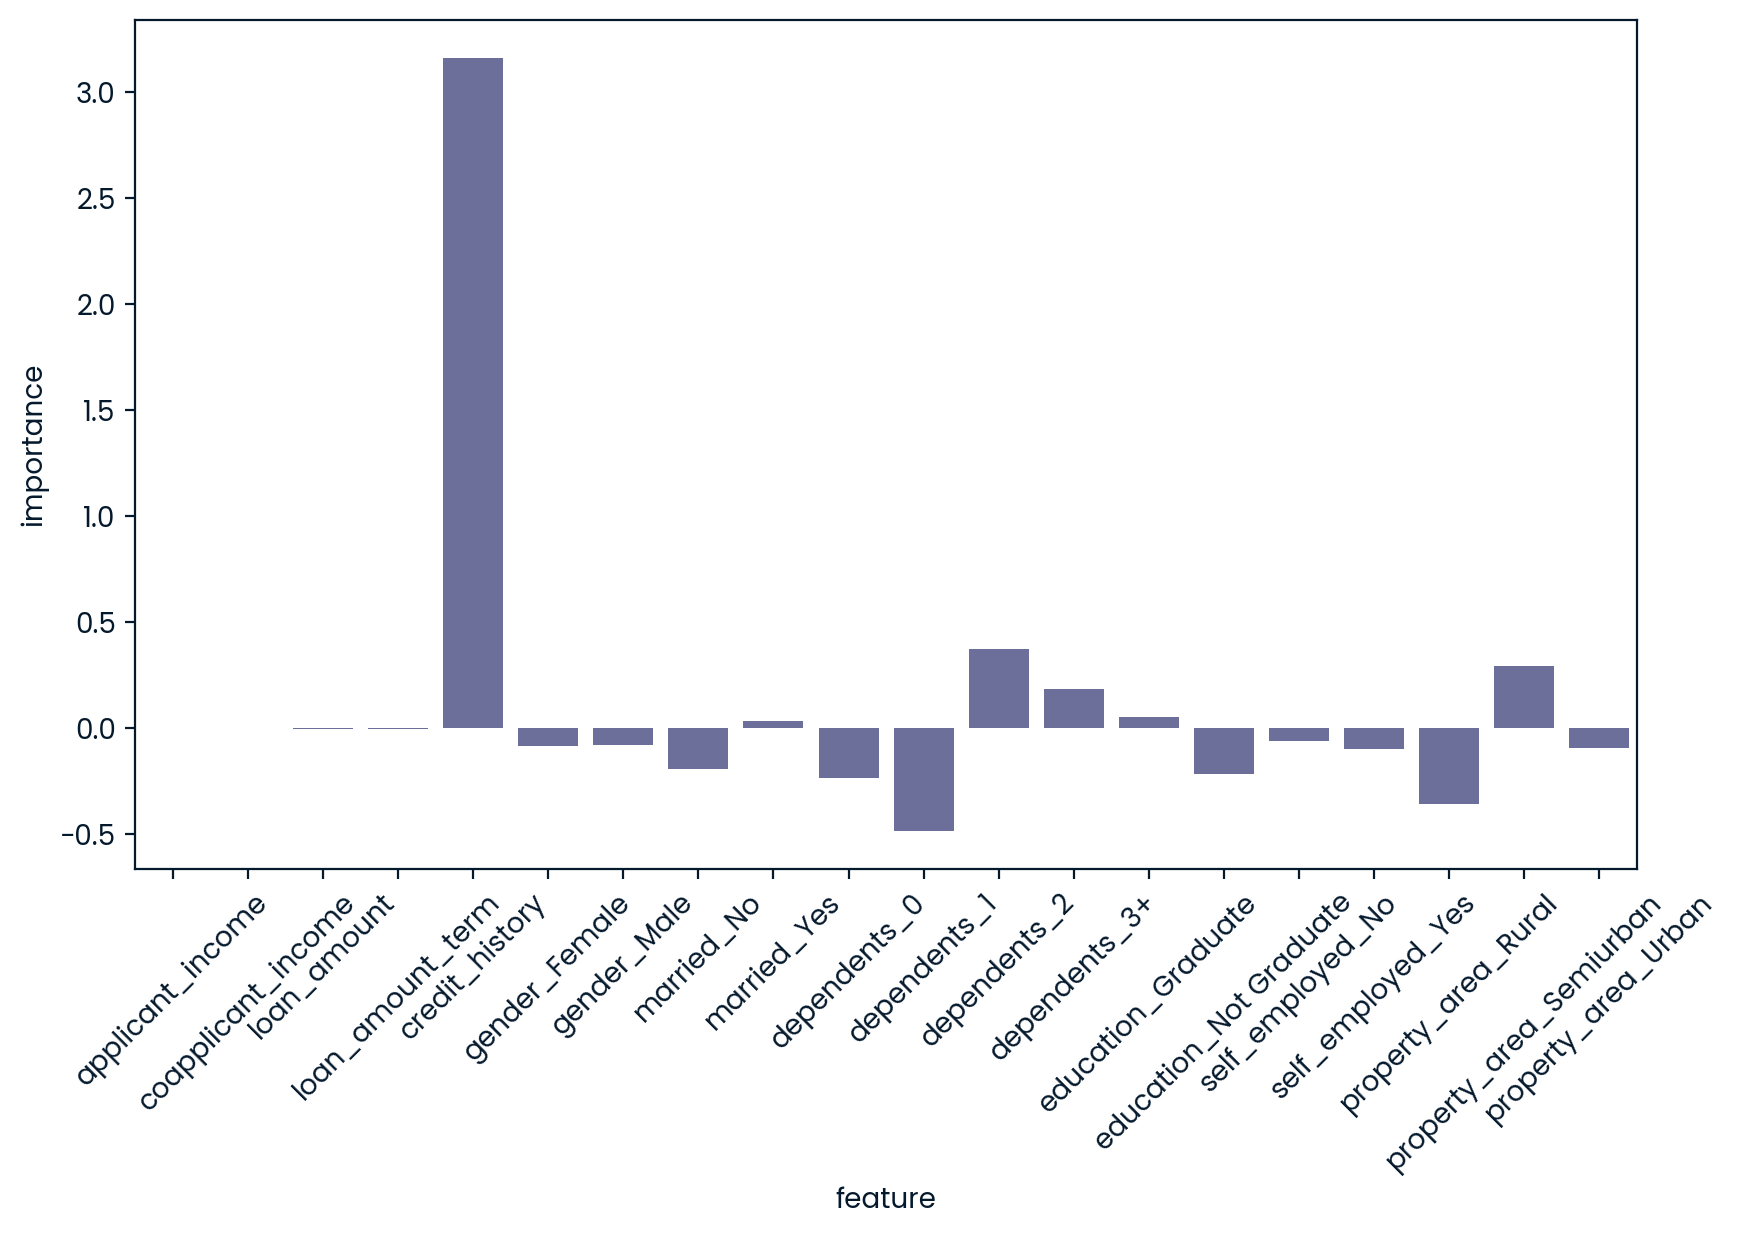

In [22]:
# Finding the importance of features
feature_importance = pd.DataFrame({
    "feature" : features_train.columns,
    "importance" : clf.coef_.reshape(-1)
})

plt.figure(figsize=(9,5))
sns.barplot(data=feature_importance, x="feature", target = "importance")
plt.tight_latargetout()
plt.xticks(rotation=45)
plt.show()

# How might we improve model performance?

* Further [preprocessing](https://app.datacamp.com/learn/courses/preprocessing-for-machine-learning-in-python):
	- Log transformations for skewed distributions.
	- Scale feature values. 
	- Remove outliers e.g., high earners.
* Try a different model e.g., [Decision trees](https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python).
* Gather more data.
	- Train new models on incorrect predictions (may need more data and/or a holdout set).
* [Further feature engineering](https://app.datacamp.com/learn/courses/feature-engineering-for-machine-learning-in-python).
* [Hyperparameter tuning](https://app.datacamp.com/learn/courses/hyperparameter-tuning-in-python).